In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
worksheet = gc.open('exp no 1').sheet1
data=worksheet.get_all_values()
print(data)

[['input', 'Output'], ['1', '15'], ['2', '20'], ['3', '25'], ['4', '30'], ['5', '35'], ['6', '40'], ['7', '45'], ['8', '50'], ['9', '55'], ['10', '60'], ['11', '65'], ['12', '70'], ['13', '75'], ['14', '80'], ['15', '85'], ['16', '90'], ['17', '95'], ['18', '100'], ['19', '105'], ['20', '110']]


In [6]:
dataset1 = pd.DataFrame(data[1:], columns=data[0])
dataset1 = dataset1.astype({'input':'float'})
dataset1 = dataset1.astype({'Output':'float'})

In [8]:
X = dataset1[['input']].values
y = dataset1[['Output']].values

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 30)


In [10]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)
X_train1 = Scaler.transform(X_train)

In [11]:
ai_model=Sequential([
    Dense(units=8,activation='relu',input_shape=[1]),
    Dense(units=9,activation='relu'),
    Dense(units=1)
])

In [12]:
ai_model.compile(optimizer='rmsprop',loss='mse')

In [13]:
ai_model.fit(X_train1,y_train,epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 4980.2808
Epoch 2/20
1/1 [==============================] - 0s 10ms/step - loss: 4976.6460
Epoch 3/20
1/1 [==============================] - 0s 10ms/step - loss: 4974.0259
Epoch 4/20
1/1 [==============================] - 0s 18ms/step - loss: 4971.8047
Epoch 5/20
1/1 [==============================] - 0s 11ms/step - loss: 4969.7725
Epoch 6/20
1/1 [==============================] - 0s 13ms/step - loss: 4967.6909
Epoch 7/20
1/1 [==============================] - 0s 11ms/step - loss: 4965.2212
Epoch 8/20
1/1 [==============================] - 0s 11ms/step - loss: 4962.9990
Epoch 9/20
1/1 [==============================] - 0s 11ms/step - loss: 4960.9736
Epoch 10/20
1/1 [==============================] - 0s 11ms/step - loss: 4959.0752
Epoch 11/20
1/1 [==============================] - 0s 12ms/step - loss: 4957.2681
Epoch 12/20
1/1 [==============================] - 0s 12ms/step - loss: 4955.5352
Epoch 13/20
1/1 [==========

<Axes: >

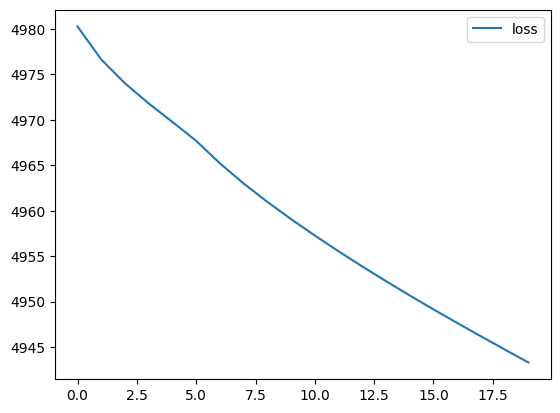

In [14]:
loss_df = pd.DataFrame(ai_model.history.history)
loss_df.plot()

In [15]:
X_test1 = Scaler.transform(X_test)
ai_model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 207ms/step - loss: 4375.2671


4375.26708984375

In [16]:
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai_model.predict(X_n1_1)

1/1 [==============================] - 0s 102ms/step


array([[-0.9197479]], dtype=float32)